- 	EDUCATION: Number of years of education.
- 	SOUTH: Indicator variable for Southern Region (1=Person lives in South, 0=Person lives elsewhere).
-	SEX: Indicator variable for sex (1=Female, 0=Male).
-	EXPERIENCE: Number of years of work experience.
-	UNION: Indicator variable for union membership (1=Union member, 0=Not union member).
-	WAGE: Wage (dollars per hour).
-	AGE: Age (years).
-	RACE: Race (1=Other, 2=Hispanic, 3=White).
-	OCCUPATION: Occupational category (1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other).
-	SECTOR: Sector (0=Other, 1=Manufacturing, 2=Construction).
-	MARR: Marital Status (0=Unmarried,  1=Married)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Veri yükleme
data = pd.read_csv('cleaned_wages.csv')  # dosya yolunuza göre değiştirin
data


,EDUCATION,SOUTH,SEX,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,9,1,0,29,0,19.98,44,3,6,0,1
1,12,0,0,37,0,7.30,55,3,6,2,1
2,7,1,0,44,0,8.00,57,3,6,0,1
3,12,0,0,26,1,22.20,44,3,6,1,1
4,11,0,0,16,0,3.65,33,3,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...
509,17,1,0,2,0,7.00,25,3,5,0,1
510,9,1,1,34,1,5.75,49,1,5,0,1
511,15,0,1,11,0,7.67,32,3,5,0,1
512,15,0,0,10,0,12.50,31,3,5,0,0


In [42]:
# Bağımlı ve bağımsız değişkenler
X = data.drop('WAGE', axis=1)
y = data['WAGE']

# Kategorik veriler için one-hot encoding
categorical_features = ['SEX', 'UNION', 'SOUTH', 'RACE', 'OCCUPATION', 'SECTOR', 'MARR']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough')

# Karar ağacı modeli pipeline ile oluşturma
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=0))
])

# Modeli eğitme
model.fit(X, y)

# Önemli özellikleri çıkartma
importance = model.named_steps['regressor'].feature_importances_


# Kategorik özellik isimlerini ve kalan sütun isimlerini ayrı olarak alma
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

# Önemli özellikleri içeren dataframe oluşturma
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance}).sort_values(by='Importance', ascending=False)

# Sonucu görme
print(importance_df)





                  Feature  Importance
15         remainder__AGE    0.288588
13   remainder__EDUCATION    0.259961
14  remainder__EXPERIENCE    0.125091
0              cat__SEX_1    0.056057
6       cat__OCCUPATION_3    0.038912
1            cat__UNION_1    0.037202
10          cat__SECTOR_1    0.030919
7       cat__OCCUPATION_4    0.028069
2            cat__SOUTH_1    0.026049
12            cat__MARR_1    0.023618
5       cat__OCCUPATION_2    0.022769
4             cat__RACE_3    0.020331
8       cat__OCCUPATION_5    0.017677
9       cat__OCCUPATION_6    0.015442
11          cat__SECTOR_2    0.005143
3             cat__RACE_2    0.004171


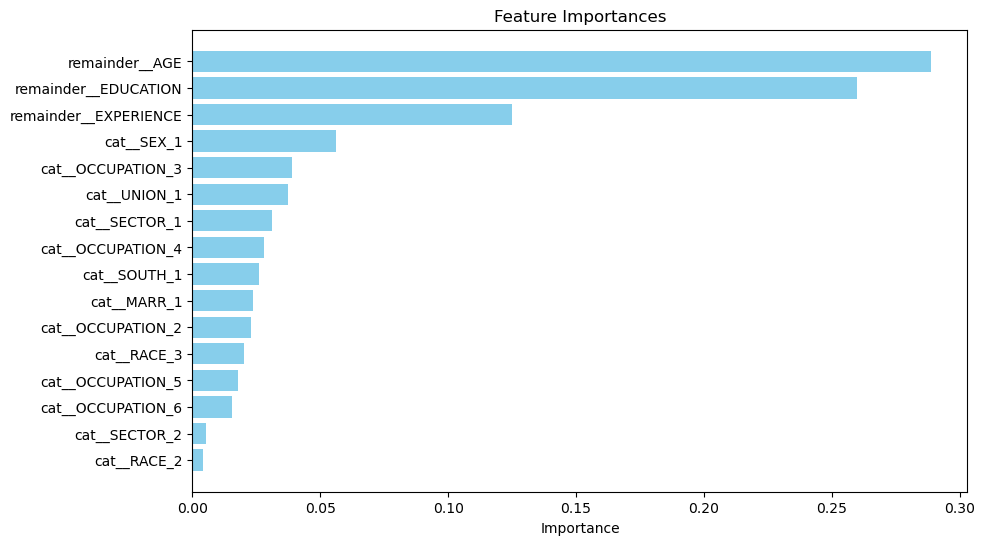

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()